# Big Mart Data Set -: EDA Report

### Problem Statement

The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to make an EDA report to find out the trend of sales of each product at a particular store.

This project is a programming assignment wherein you have to make an EDA report to understand the properties of products and stores which play a key role in increasing sales.
 

## Data Description:

The dataset has 8524 entries with 12 columns. The description of each column is given below.


Data Description

| Variable | Description |
| --- | --- | 
|Item_Identifier | Unique Product ID |
|Item_Weight | Weight of product |
|Item_Fat_Content | Wether the product is low fat or not |
|Item_Visibility | The % of total display area of all products |
| - | in a store allocated to the particular product |
|Item_Type | The category to which the product belongs |
|Item_MRP | Maximum Retail Price (list price) of the product |
|Outlet_Identifier | Unique store ID |
|Outlet_Establishment_Year | The year in which store was established |
|Outlet_Size | The size of store in terms of ground area covered |
|Outlet_Location_Type | The type of city in which the store is located |
|Outlet_Type | Wether the outlet is just a grocery | 
| - | store or some sort of supermarket |
| Item_Outlet_Sales | Sales of product in a particular store |
| - | This is our Outcome variable to be predicted |

In [419]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [420]:
import warnings
warnings.filterwarnings("ignore")

In [421]:
df=pd.read_csv('https://raw.githubusercontent.com/AyanChawla/Big-Mart/master/Big_mart.csv')

In [422]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [423]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In Describe , only one thing seems a bit strange that Item_Visibilty has 0.0 and then how it has non-zero Item_Outlet_Sales

In [424]:
df.shape

(8523, 12)

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [426]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Data Preparation

Lets now check **NULL** Values in data 

In [427]:
df.apply(lambda x: sum(x.isnull())).to_frame()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


It shows that **Item_Weight** and **Outlet_Size** has null values.

In [428]:
df.apply(lambda x: len(x.unique())).to_frame()

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3


It shows that total no. of stores are **10** and **4** types of store.

Now Lets see which columns are Categorical and Continous

First we will drop Item_Identifier , Outlet_Identifier

In [429]:
df1=df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [430]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [431]:
categorical_columns = [x for x in df1.dtypes.index if df1.dtypes[x]=='object']

In [432]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [433]:
continous_columns = [x for x in df1.dtypes.index if df1.dtypes[x]!='object']

In [434]:
continous_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [435]:
for x in categorical_columns:
    
    print(x)
    print(df[x].value_counts())
    print('\n')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: 

It shows that in Item_Fat_Cotent there are 2 coulmns , others are just same with different names

## Data Cleaning


Mainly it has Three Problems-:
    1. Item_Visibilty has 0.0 but it has non-zero Item_Outlet_Sales
    2. Item_Weight and Outlet_Size has null values.
    3. In Item_Fat_Content,Some of ‘Low Fat’ values are miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’are
       mentioned as ‘reg’.


   Lets now work on our **First** Problem i.e. Item_Visibilty has 0.0 but it has non-zero Item_Outlet_Sales

In [436]:
df['Item_Visibility'].describe().to_frame()

,Item_Visibility
count,8523.000000
mean,0.066132
std,0.051598
min,0.000000
25%,0.026989
50%,0.053931
75%,0.094585
max,0.328391


We will Substitute the values that are 0 with average of its kind of Item_Type. 
That means firstly calculate the average of visibility of each item.

In [437]:
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Type')

In [438]:
visibility_avg

,Item_Visibility
Item_Type,
Baking Goods,0.069169
Breads,0.066255
Breakfast,0.085723
Canned,0.068129
Dairy,0.072427
Frozen Foods,0.065645
Fruits and Vegetables,0.068513
Hard Drinks,0.064943
Health and Hygiene,0.055216


Now select the values that are 0.

In [439]:
missing_values = (df['Item_Visibility'] == 0)


Now substitute those values with their respective Item_Type

In [440]:
df.loc[missing_values,'Item_Visibility']= df.loc[missing_values,'Item_Type'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [441]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [442]:
sum(df['Item_Visibility'] == 0)

0

Now Our **Second** Problem

Item_Weight and Outlet_Size has null values.

First of all we will Impute Outlet_Size Null values

In [443]:
df.groupby('Outlet_Location_Type').Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Location_Type Outlet_Size             
Tier 1               Small               1458
                     Medium               930
Tier 2               NaN                 1855
                     Small                930
Tier 3               Medium              1863
                     High                 932
                     NaN                  555

In [444]:
df.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     NaN                  555
                  Small                528
Supermarket Type1 Small               1860
                  NaN                 1855
                  High                 932
                  Medium               930
Supermarket Type2 Medium               928
Supermarket Type3 Medium               935

In [445]:
df.groupby('Outlet_Type').Outlet_Location_Type.value_counts(dropna=False).to_frame()

Outlet_Location_Type
Outlet_Type       Outlet_Location_Type                      
Grocery Store     Tier 3                                 555
                  Tier 1                                 528
Supermarket Type1 Tier 2                                2785
                  Tier 1                                1860
                  Tier 3                                 932
Supermarket Type2 Tier 3                                 928
Supermarket Type3 Tier 3                                 935

In [446]:
df.groupby('Outlet_Identifier').Outlet_Size.value_counts(dropna=False).to_frame()

,,Outlet_Size
Outlet_Identifier,Outlet_Size,
OUT010,NaN,555
OUT013,High,932
OUT017,NaN,926
OUT018,Medium,928
OUT019,Small,528
OUT027,Medium,935
OUT035,Small,930
OUT045,NaN,929
OUT046,Small,930


In [447]:
df.groupby('Outlet_Identifier').Outlet_Type.value_counts(dropna=False).to_frame()

,,Outlet_Type
Outlet_Identifier,Outlet_Type,
OUT010,Grocery Store,555
OUT013,Supermarket Type1,932
OUT017,Supermarket Type1,926
OUT018,Supermarket Type2,928
OUT019,Grocery Store,528
OUT027,Supermarket Type3,935
OUT035,Supermarket Type1,930
OUT045,Supermarket Type1,929
OUT046,Supermarket Type1,930


In [448]:
visibility_avg1 = df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Identifier')
visibility_avg1

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


Hence we can conclude that 
1. Grocery Store can be small and medium but judjing by average sales, it must be small
2. Supermarket Type1 has 1855 null values that is total of OUT045(929) and OUT017(926) and it has small and high but not medium, so its missing medium. Also we can judge it by missing values.

We have to substitute Grocery store as small and Supermarket Type1 as medium

In [449]:
df.loc[df.Outlet_Identifier.isin(['OUT010']), 'Outlet_Size'] = 'Small'

In [450]:
df.loc[df.Outlet_Identifier.isin(['OUT017','OUT045']), 'Outlet_Size'] = 'Medium'

In [451]:
sum(df['Outlet_Size'].isnull())

0

Now Lets work on Item_Weight.

We will substitute it by average items weight.

In [452]:
item_avg_weight = df.groupby('Item_Identifier').Item_Weight.mean()

In [453]:
df.Item_Weight.fillna(0, inplace = True)

In [454]:
for index, row in df.iterrows():
    if(row.Item_Weight == 0):
        df.loc[index, 'Item_Weight'] = item_avg_weight[row.Item_Identifier]

In [455]:
sum(df['Item_Weight'].isnull())

4

Still we get some null values, you know why??
First look at the following code

In [456]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDX04     9
NCI54     9
NCF42     9
FDG09     9
FDP25     9
FDU12     9
NCL31     9
NCQ06     9
FDD38     9
DRE49     9
FDT07     9
FDW26     9
NCB18     9
FDF56     9
FDV38     9
DRN47     9
FDW49     9
FDX20     9
FDO19     9
NCJ30     9
FDF52     9
FDX31     9
NCY18     9
FDQ40     9
FDV60     9
FDK58     8
FDV09     8
FDZ33     8
         ..
FDB47     2
NCX53     2
DRE01     2
FDR57     2
FDW58     2
FDU09     2
FDR03     2
FDE38     2
FDG28     2
DRG25     2
DRC24     2
DRI59     2
FDI36     2
FDT33     2
NCM42     2
FDD48     2
FDP15     2
FDD22     2
FDA48     2
FDZ50     2
NCW05     2
FDE52     1
FDQ60     1
FDK57     1
DRF48     1
FDO33     1
FDC23     1
FDN52     1
FDT35     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

This shows that some Items are mentioned more than once , so we calculated average by grouping Item_Identifier,that means we calculated average of weight of each item by its other records but those 4 Items that are still showing Null , we dont have any records of their weight. 

In [457]:
df.query("Item_Weight=='Nan'")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


So, now its better if we Drop these because they are gonna effect very little.

In [458]:
df=df.dropna()

In [459]:
df.query("Item_Weight=='Nan'")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Null Values are removed succsefully.

Now lets work on our **Third** Problem.

In Item_Fat_Content,Some of ‘Low Fat’ values are miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’are
   mentioned as ‘reg’.

In [460]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

In [461]:
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

Now we have only 2 values of Fat Content.

We are all set to Proceed Further

# Derived Metrics

These are those columns that we create to look at the data set more precisely. We will derive some variables that will help us understand the data better.Like if we carefully look at the column *Item_Identifier* in the following way.

In [462]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [463]:
df['Item_Type_Combined'].value_counts()

FD    6121
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

If we look at it, there are precisely 3 types of items.
1. FD  
2. NC 
3. DR  

After some searching we found their full forms
1. FD : Freeze Dried(Food)  
2. NC : Non Consumable
3. DR : Drinks


In [464]:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

Now , you must ask a question that why a NC item is having fat_content, soo lets seperate them.

In [465]:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Consumable"

In [466]:
df['Item_Fat_Content'].value_counts()

Low Fat           3917
Regular           3003
Non-Consumable    1599
Name: Item_Fat_Content, dtype: int64

We can make another variable, How many years it has been Open 

In [467]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe().to_frame()

,Outlet_Years
count,8519.000000
mean,15.162108
std,8.369105
min,4.000000
25%,9.000000
50%,14.000000
75%,26.000000
max,28.000000


In [468]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Consumable,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


Now we are Fully ready to proceed With Univariate Analysis.

# Univariate Analysis

First we will look at the continous variables.

In [469]:
continous_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

### Item_Outlet_Sales
Lets look broadly at the Sales

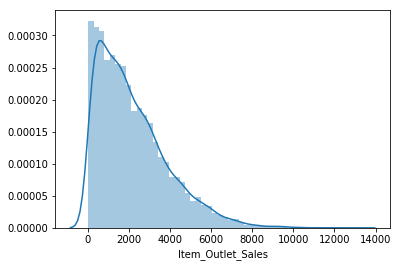

In [470]:
sns.distplot(df['Item_Outlet_Sales'])

It is skewed Left

### Item_Weight

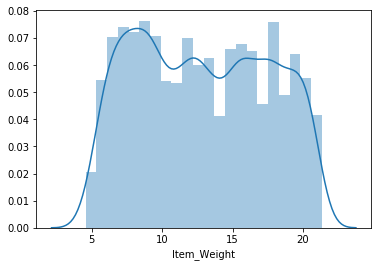

In [471]:
sns.distplot(df['Item_Weight'])

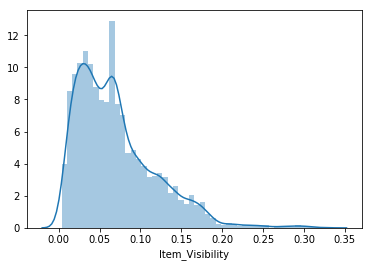

In [472]:
sns.distplot(df['Item_Visibility'])

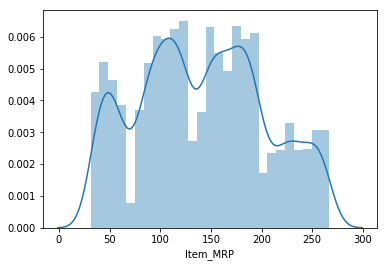

In [473]:
sns.distplot(df['Item_MRP'])

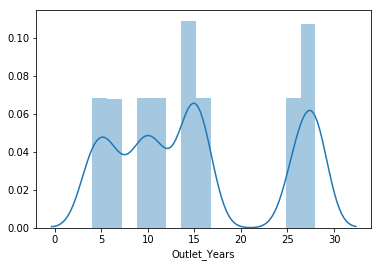

In [474]:
sns.distplot(df['Outlet_Years'])

Now lets look at Categorical Columns

In [475]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

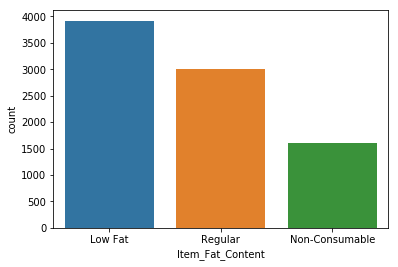

In [476]:
sns.countplot(df['Item_Fat_Content'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

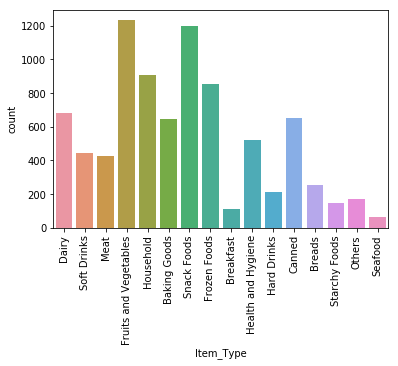

In [477]:
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)

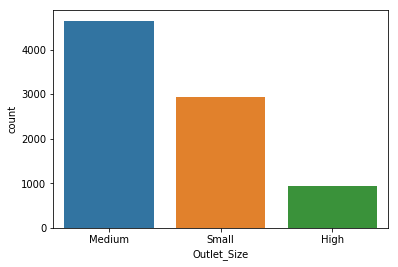

In [478]:
sns.countplot(df['Outlet_Size'])

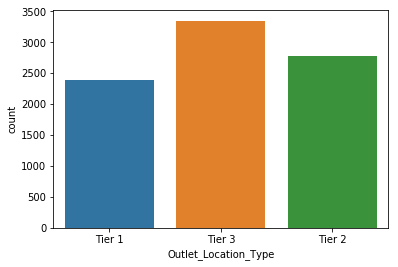

In [479]:
sns.countplot(df['Outlet_Location_Type'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

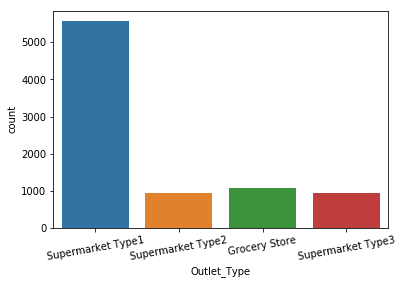

In [480]:
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=10)

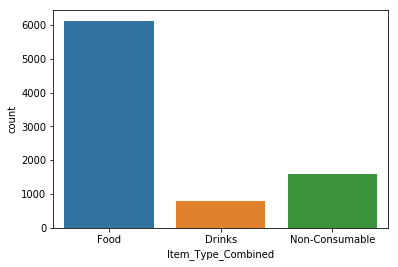

In [481]:
sns.countplot(df['Item_Type_Combined'])

# Bivariate Analysis
Now lets look at Bivariate Analysis.

In [482]:
corr=df.corr()

In [483]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017871,0.025975,-0.013426,0.013168,0.013426
Item_Visibility,-0.017871,1.000000,-0.004917,-0.077760,-0.133590,0.077760
Item_MRP,0.025975,-0.004917,1.000000,0.004599,0.567803,-0.004599
Outlet_Establishment_Year,-0.013426,-0.077760,0.004599,1.000000,-0.049083,-1.000000
Item_Outlet_Sales,0.013168,-0.133590,0.567803,-0.049083,1.000000,0.049083
Outlet_Years,0.013426,0.077760,-0.004599,-1.000000,0.049083,1.000000


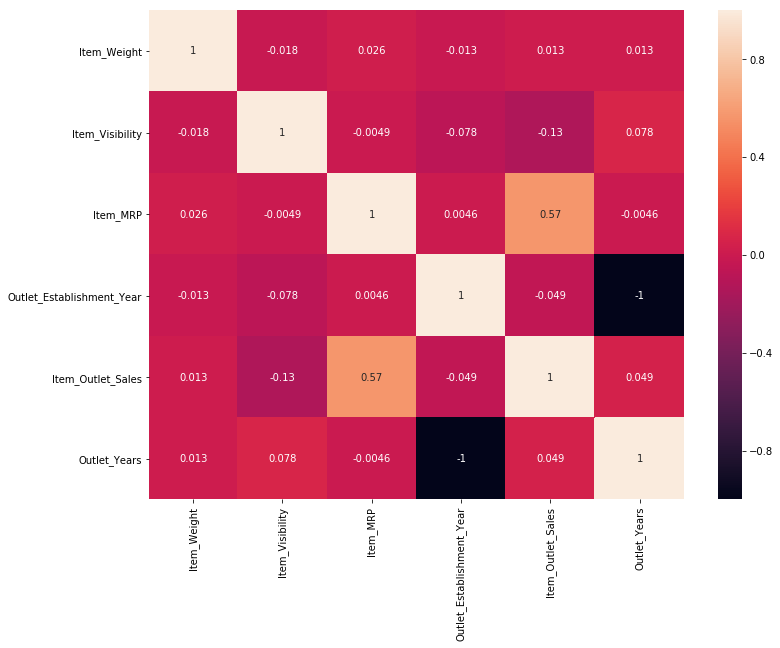

In [484]:
plt.subplots(figsize=(12, 9))
sns.heatmap(corr,annot=True)

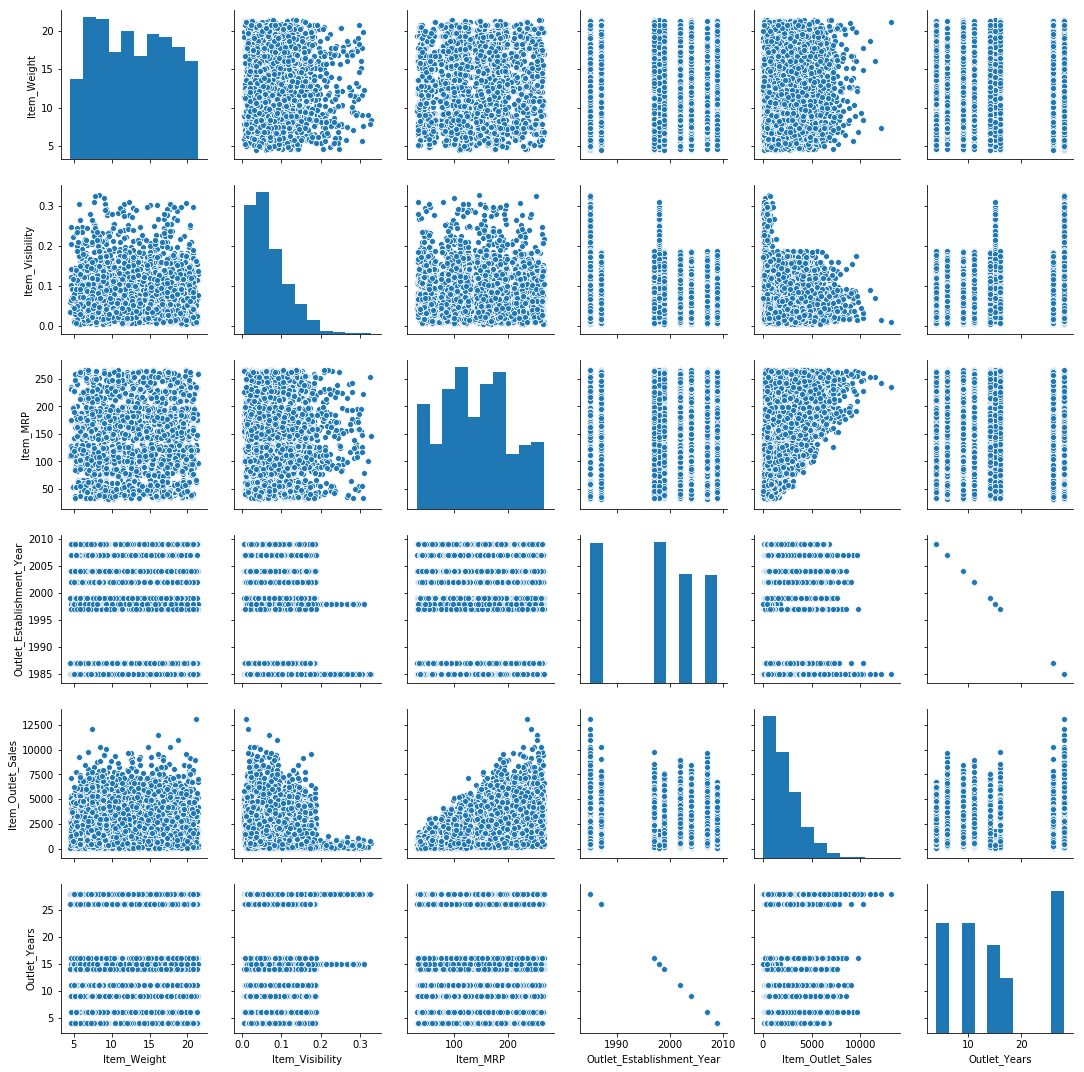

In [485]:
sns.pairplot(df)

### Item_Weight VS Item_Outlet_Sales

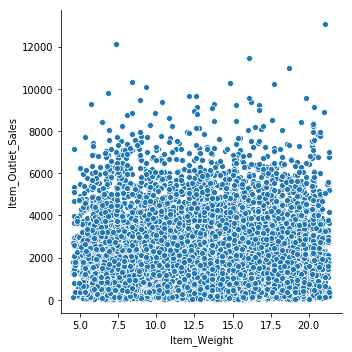

In [487]:
sns.relplot(x="Item_Weight", y="Item_Outlet_Sales", data=df,ci=None)

### Item_Visibility VS Item_Outlet_Sales

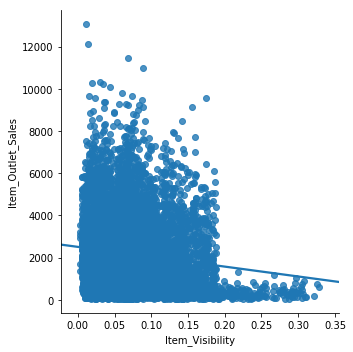

In [488]:
sns.lmplot(x="Item_Visibility", y="Item_Outlet_Sales", data=df,ci=None)

### Item_MRP VS Item_Outlet_Sales

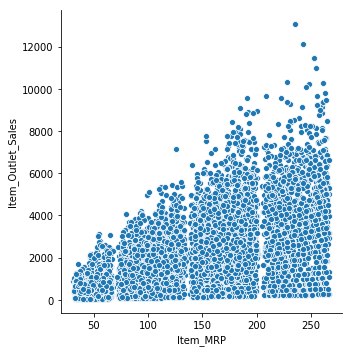

In [489]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=df,ci=None)

### Outlet_Years VS Item_Outlet_Sales

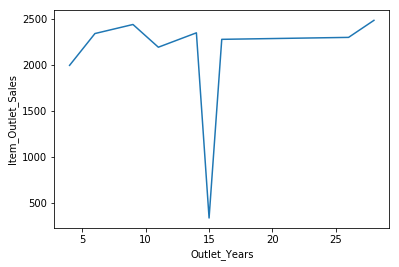

In [490]:
sns.lineplot(x="Outlet_Years", y="Item_Outlet_Sales", data=df,ci=None)

### Item_Fat_Content VS Item_Outlet_Sales

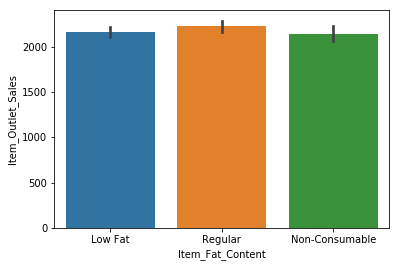

In [491]:
sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=df)

### Item_Type VS Item_Outlet_Sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

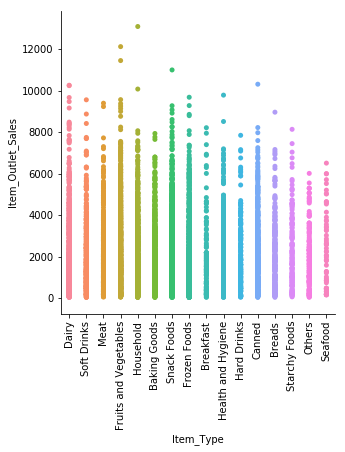

In [492]:
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", data=df,jitter=False)
plt.xticks(rotation=90)

### Outlet_Identifier VS Item_Outlet_Sales

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

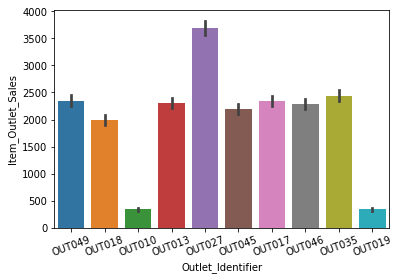

In [493]:
sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=df)
plt.xticks(rotation=20)

### Outlet_Size VS Item_Outlet_Sales

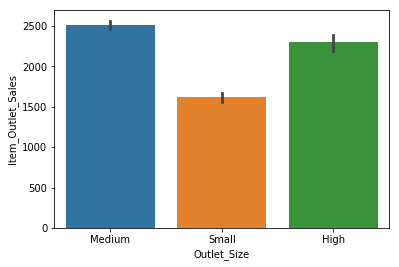

In [494]:
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=df)

### Outlet_Location_Type VS Item_Outlet_Sales

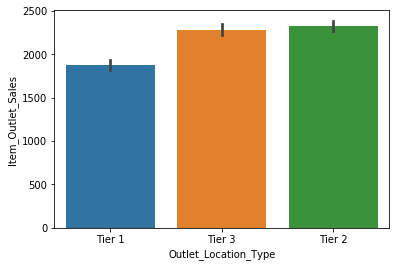

In [495]:
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df)

### Outlet_Type VS Item_Outlet_Sales

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

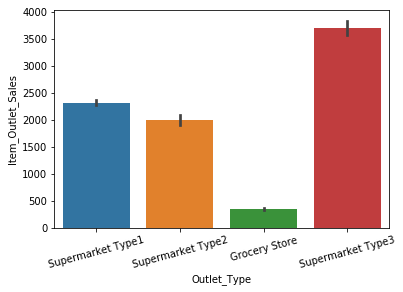

In [496]:
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)
plt.xticks(rotation=15)

### Item_Type_Combined VS Item_Outlet_Sales

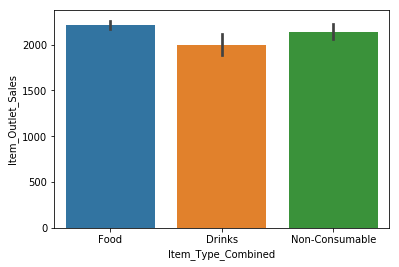

In [497]:
sns.barplot(x="Item_Type_Combined", y="Item_Outlet_Sales", data=df)

# Multivariate Analysis

In [498]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Consumable,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


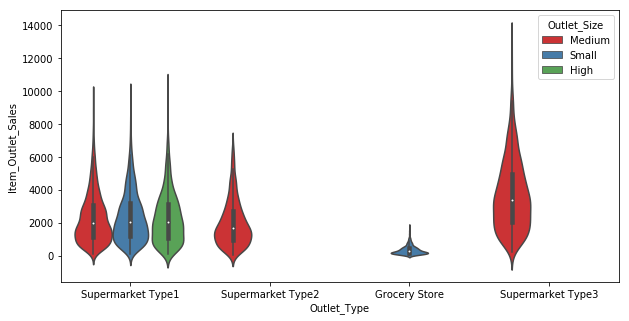

In [499]:
plt.figure(figsize = (10,5))
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Size', data=df, palette="Set1")

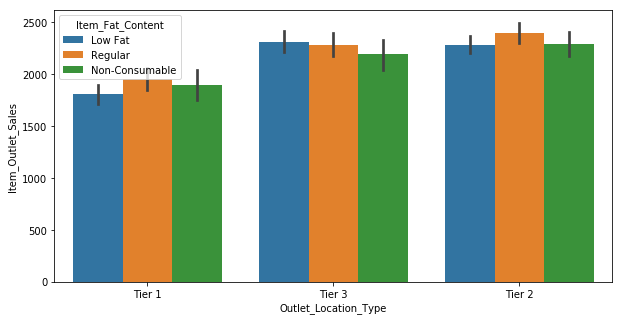

In [508]:
plt.figure(figsize = (10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Item_Fat_Content', data=df)

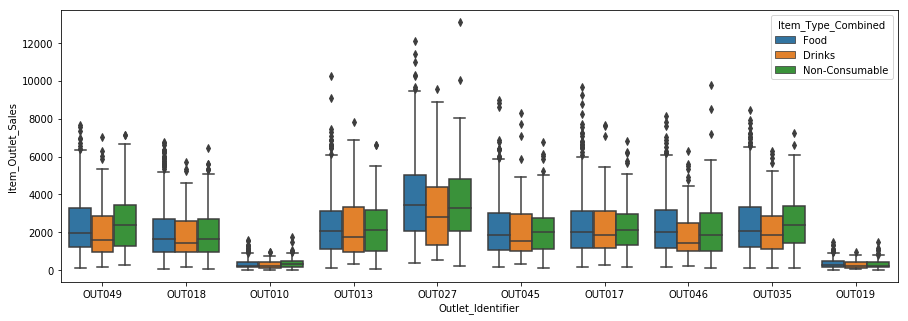

In [501]:
plt.figure(figsize = (15,5))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales',hue='Item_Type_Combined', data=df)

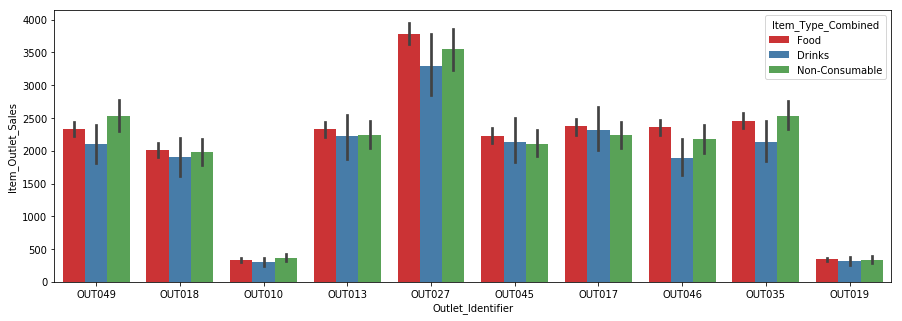

In [502]:
plt.figure(figsize = (15,5))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales',hue='Item_Type_Combined', data=df,palette='Set1')

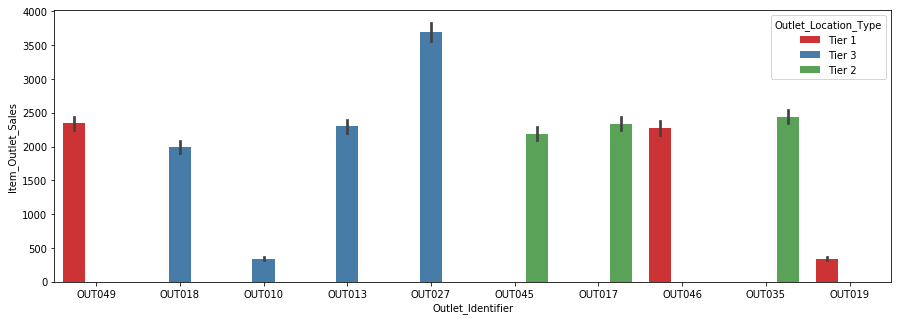

In [503]:
plt.figure(figsize = (15,5))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales',hue='Outlet_Location_Type', data=df,palette='Set1')

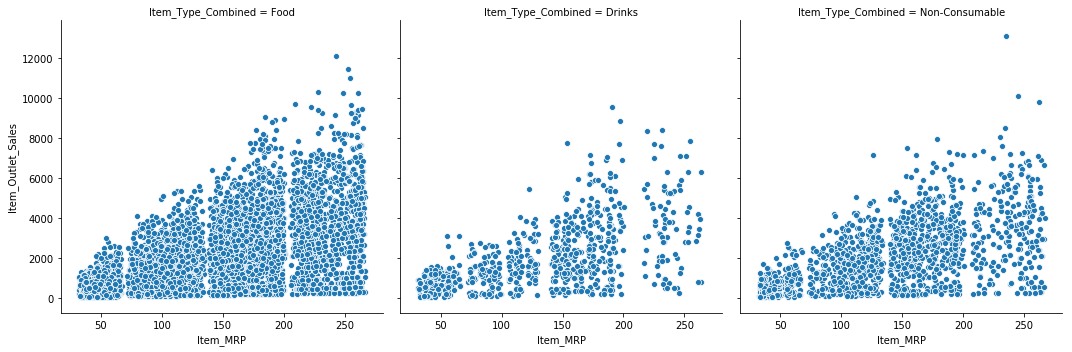

In [504]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", col="Item_Type_Combined",  data=df)

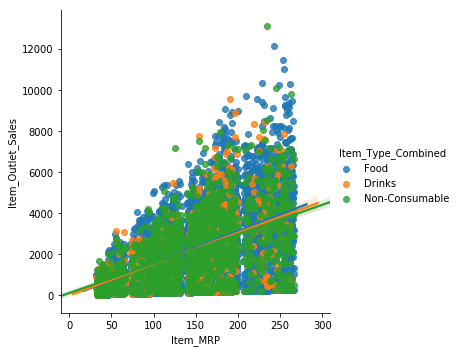

In [505]:
sns.lmplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type_Combined",  data=df)

# Conclusion

We can see from the graphs that Non Consimables and Low Fat Products have more sales an OUT_027 store has the highest sales as it is Located in Tier 3 city and is a Supermarket type 3

| Name | Description | Type | Impact |
| --- | --- | --- | --- |
|Item_Identifier | Unique Product ID | Discrete | Low |
|Item_Weight | Weight of product | Continous | Medium |
|Item_Fat_Content | Wether the product is low fat or not | Ordinal | Medium |
|Item_Visibility | The % of total display area of all products | Continous | High |
| - | in a store allocated to the particular product | - | - |
|Item_Type | The category to which the product belongs | Nominal | High |
|Item_MRP | Maximum Retail Price (list price) of the product | Continous | Medium |
|Outlet_Identifier | Unique store ID | Discrete | Low |
|Outlet_Establishment_Year | The year in which store was established | Discrete |Low |
|Outlet_Size | The size of store in terms of ground area covered | Ordinal | High |
|Outlet_Location_Type | The type of city in which the store is located | Ordinal |High |
|Outlet_Type | Wether the outlet is just a grocery | Ordinal | High |
| - | store or some sort of supermarket | - | - |
| Item_Outlet_Sales | Sales of product in a particular store | Continous | Traget |
| - | This is our Outcome variable to be predicted | - | - |